# 04.07 - Customizing Colorbars

For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

The simplest colorbar can be made using the <code>plt.colorbar</code> function:

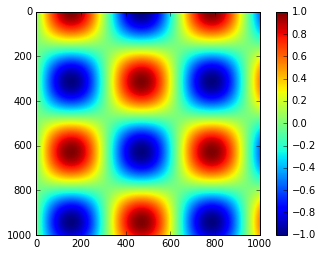

In [3]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

### Customizing Colorbars

We can customize the color using the <code>cmap</code> argument in the plotting function:

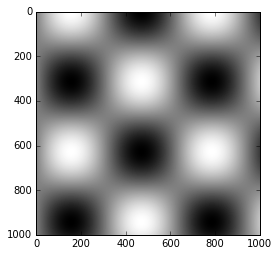

In [4]:
plt.imshow(I, cmap='gray');

### Choosing the Colormap

_Deciding_ which colormap to use is often more difficult than _being able_ to choose it. 

High-level advice is to be aware of three categories:

1. **Sequential colormaps**: These are made up of one continuous sequence of colors (e.g., <code>binary</code> or <code>viridis</code>).

2. **Divergent colormaps**: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., <code>RdBu</code> or <code>PuOr</code>).

3. **Qualitative colormaps**: these mix colors with no particular sequence (e.g., <code>rainbow</code> or <code>jet</code>).


### Color limits and extensions

Colobars themselves can be easily customized in Matplotlib. For example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the <code>extend</code> property. 

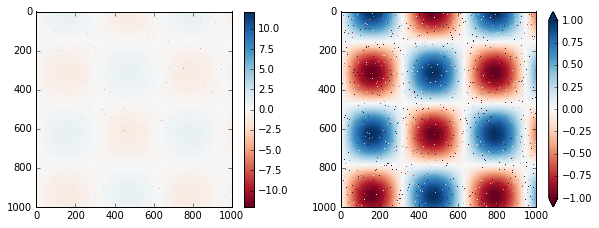

In [5]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

By limiting the values (and therefore giving less prominance to noise) the left visualization is much more clear.

### Discrete Color Bars

Color bars are by default continuous, but it may be useful sometimes to have discrete ones. In this case, <code>plt.cm.get_cmap()</code> becomes particularly useful: 

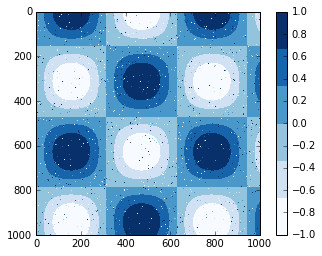

In [6]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

### Example: Handwritten Digits

For an example of this, let's use a renowned Scikt-Learn dataset consisting of 2000 handwritten digits made of 8 x 8 pixels: 

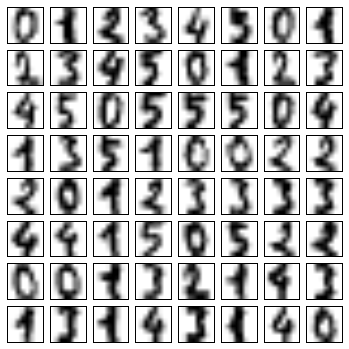

In [7]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

We can now consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel. 

However, representing this visually can be an issue. In this example, we will use a _dimensionality reduction_ technique called **manifold learning** to plot our digits in two dimensions.

In [8]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

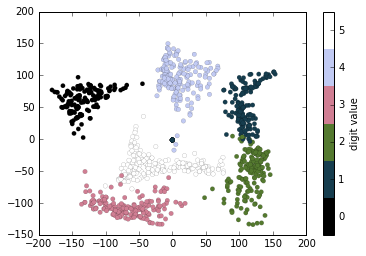

In [9]:
# plot the results with discrete colormap
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

As we would expect from intuition, 3 and 5 are regarded as the most similar digits (with even overlapping values) while 0 and 1 are the most distant, easily distinguishable.